In [1]:
import datetime
start_time = datetime.datetime.now()
start_time

datetime.datetime(2022, 4, 22, 21, 3, 46, 90920)

In [2]:
# Also runs installation of dependencies
from util import *

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import altair as alt

In [4]:
df2019 = pd.read_csv('TEDS-D-2019-DS0001-bndl-data-tsv_V1.zip')
df2018 = pd.read_csv('TEDS-D-2018-DS0001-bndl-data-tsv.zip')
df2017 = pd.read_csv('TEDS-D-2017-DS0001-bndl-data-tsv.zip')
df2016 = pd.read_csv('TEDS-D-2016-DS0001-bndl-data-tsv.zip')

In [5]:
state_dict = {1:'Alabama',2:'Alaska',4:'Arizona', 5:'Arkansas',6:'California',8:'Colorado',9:'Connecticut',
              10:'Delaware', 11:'District of Columbia', 12:'Florida', 13:'Georgia', 15:'Hawaii', 16:'Idaho', 
              17:'Illinois', 18:'Indiana', 19:'Iowa', 20:'Kansas', 21:'Kentucky', 22:'Louisiana', 23:'Maine', 
              24:'Maryland', 25:'Massachusetts', 26:'Michigan', 27:'Minnesota', 28:'Mississippi', 29:'Missouri',
              30:'Montana', 31:'Nebraska', 32:'Nevada', 33:'New Hampshire', 34:'New Jersey', 35:'New Mexico', 
              36:'New York', 37:'North Carolina', 38:'North Dakota', 39:'Ohio', 40:'Oklahoma', 42:'Pennsylvania',
              44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah',
              50:'Vermont', 51:'Virginia', 55:'Wisconsin', 56:'Wyoming', 72:'Puerto Rico'}

reason_dict = {1:'1 - Treatment Completed', 2:'2 - Dropped out of treatment', 3:'3 - Terminated by facility', 
               4:'4 - Transferred to another treatment/facility',5:'5 - Incarcerated',6:'6 - Death',7:'7 - Other'}

substance_dict = {1:'None', 2:'Alcohol', 3:'Cocaine', 4:'Marijuana', 5:'Heroin', 6:'Non-prescription methadone', 
                  7:'Other opiates/synthetics', 8:'PCP', 9:'Hallucinogens', 10:'Methamphetamine', 11:'Other amphetamines', 
                  12:'Other stimulants', 13:'Benzodiazepines', 14:'Other tranqs', 15:'Barbiturates', 16:'Other sedatives/hypnotics',
                 17:'Inhalants', 18:'OTC Medications', 19:'Other drugs', -9:'MISSING'}

gender_dict = {1:'Male',2:'Female'}

In [6]:
state_completion_2019_df = df2019.groupby(['STFIPS','REASON']).size().reset_index()
state_completion_2019_df = state_completion_2019_df.rename(columns={0:'COUNT'})
state_completion_2019_df['PERC'] = 100 * state_completion_2019_df['COUNT'] / state_completion_2019_df.groupby(['STFIPS'])['COUNT'].transform('sum')

In [7]:
state_completion_2019_df = state_completion_2019_df.replace({'STFIPS': state_dict})
state_completion_2019_df = state_completion_2019_df.replace({'REASON': reason_dict})

In [8]:
# %matplotlib inline

# bar = alt.Chart(state_completion_2019_df).mark_bar().transform_calculate(
#         filtered='datum.REASON == "1 - Treatment Completed" ? datum.PERC : 0'
#         ).encode(
#             x=alt.X('PERC:Q', scale=alt.Scale(domain=(0,100)), axis=alt.Axis(title='Percentage of Cases')),
#             y=alt.Y('STFIPS:N', sort=alt.SortField('filtered', order = 'descending'), axis=alt.Axis(title='State')),
#             color='REASON:N',
#             order=alt.Order('REASON',sort='ascending'))

# bar

In [9]:
test = state_completion_2019_df.pivot(index='STFIPS', columns='REASON', values='PERC')

test = test.reset_index()

test['YEAR'] = 2019


In [10]:
state_completion_2018_df = df2018.groupby(['STFIPS','REASON']).size().reset_index()
state_completion_2018_df = state_completion_2018_df.rename(columns={0:'COUNT'})
state_completion_2018_df['PERC'] = 100 * state_completion_2018_df['COUNT'] / state_completion_2018_df.groupby(['STFIPS'])['COUNT'].transform('sum')

state_completion_2018_df = state_completion_2018_df.replace({'STFIPS': state_dict})
state_completion_2018_df = state_completion_2018_df.replace({'REASON': reason_dict})

test2018 = state_completion_2018_df.pivot(index='STFIPS', columns='REASON', values='PERC')
test2018 = test2018.reset_index()
test2018['YEAR'] = 2018

state_completion_2017_df = df2017.groupby(['STFIPS','REASON']).size().reset_index()
state_completion_2017_df = state_completion_2017_df.rename(columns={0:'COUNT'})
state_completion_2017_df['PERC'] = 100 * state_completion_2017_df['COUNT'] / state_completion_2017_df.groupby(['STFIPS'])['COUNT'].transform('sum')

state_completion_2017_df = state_completion_2017_df.replace({'STFIPS': state_dict})
state_completion_2017_df = state_completion_2017_df.replace({'REASON': reason_dict})

test2017 = state_completion_2017_df.pivot(index='STFIPS', columns='REASON', values='PERC')
test2017 = test2017.reset_index()
test2017['YEAR'] = 2017

state_completion_2016_df = df2016.groupby(['STFIPS','REASON']).size().reset_index()
state_completion_2016_df = state_completion_2016_df.rename(columns={0:'COUNT'})
state_completion_2016_df['PERC'] = 100 * state_completion_2016_df['COUNT'] / state_completion_2016_df.groupby(['STFIPS'])['COUNT'].transform('sum')

state_completion_2016_df = state_completion_2016_df.replace({'STFIPS': state_dict})
state_completion_2016_df = state_completion_2016_df.replace({'REASON': reason_dict})

test2016 = state_completion_2016_df.pivot(index='STFIPS', columns='REASON', values='PERC')
test2016 = test2016.reset_index()
test2016['YEAR'] = 2016

concated = [test, test2018, test2017, test2016]

result = pd.concat(concated).reset_index()

result

REASON,index,STFIPS,1 - Treatment Completed,2 - Dropped out of treatment,3 - Terminated by facility,4 - Transferred to another treatment/facility,5 - Incarcerated,6 - Death,7 - Other,YEAR
0,0,Alabama,33.913392,34.779471,7.931034,13.119487,2.101043,0.208500,7.947073,2019
1,1,Alaska,38.346354,18.059896,19.140625,11.953125,2.213542,0.312500,9.973958,2019
2,2,Arizona,99.318122,0.053951,0.014986,0.028474,0.505039,0.051703,0.027725,2019
3,3,Arkansas,59.288538,20.355731,6.958169,12.310606,1.012846,0.041173,0.032938,2019
4,4,California,23.198539,48.973439,0.030071,26.216950,1.245705,0.296203,0.039093,2019
...,...,...,...,...,...,...,...,...,...,...
190,44,Utah,37.958682,28.329962,8.877492,21.633921,2.976018,0.223924,NaN,2016
191,45,Vermont,25.458248,34.613035,7.026477,23.706721,3.431772,0.325866,5.437882,2016
192,46,Virginia,39.257308,NaN,36.276007,NaN,4.577298,0.447722,19.441664,2016
193,47,Wisconsin,55.897093,23.605079,4.076178,10.958904,2.990311,0.367524,2.104911,2016


In [11]:
new_dict = {value:key for (key, value) in state_dict.items()}

result = result.replace({'STFIPS': new_dict})

In [12]:
result.fillna(0)

REASON,index,STFIPS,1 - Treatment Completed,2 - Dropped out of treatment,3 - Terminated by facility,4 - Transferred to another treatment/facility,5 - Incarcerated,6 - Death,7 - Other,YEAR
0,0,1,33.913392,34.779471,7.931034,13.119487,2.101043,0.208500,7.947073,2019
1,1,2,38.346354,18.059896,19.140625,11.953125,2.213542,0.312500,9.973958,2019
2,2,4,99.318122,0.053951,0.014986,0.028474,0.505039,0.051703,0.027725,2019
3,3,5,59.288538,20.355731,6.958169,12.310606,1.012846,0.041173,0.032938,2019
4,4,6,23.198539,48.973439,0.030071,26.216950,1.245705,0.296203,0.039093,2019
...,...,...,...,...,...,...,...,...,...,...
190,44,49,37.958682,28.329962,8.877492,21.633921,2.976018,0.223924,0.000000,2016
191,45,50,25.458248,34.613035,7.026477,23.706721,3.431772,0.325866,5.437882,2016
192,46,51,39.257308,0.000000,36.276007,0.000000,4.577298,0.447722,19.441664,2016
193,47,55,55.897093,23.605079,4.076178,10.958904,2.990311,0.367524,2.104911,2016


In [13]:
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')

years = ['2019','2018', '2017','2016']

base = alt.Chart(result).mark_geoshape().encode(
    color='1 - Treatment Completed:Q'
).properties(
    width=500,
    height=300
).transform_lookup(
    lookup='STFIPS',
    from_ = alt.LookupData(states, 'id', fields=['type','properties','geometry'])
).project(
    type='albersUsa'
)

year_slider = alt.binding_range(min=2016, max=2019, step=1)
slider_selection = alt.selection_single(bind=year_slider, fields=['YEAR'], name="TEST")

filter_year = base.add_selection(
    slider_selection
).transform_filter(
    slider_selection
).properties(title='Year Testing')

filter_year

alt.Chart(...)

In [14]:
'''Quick CSV export for Tableau testing, feel free to ignore'''

# result = result.replace({'STFIPS': state_dict})

# compression_opts = dict(method='zip',
#                         archive_name='out.csv')  
# result.to_csv('out.zip', index=False,
#           compression=compression_opts)

'Quick CSV export for Tableau testing, feel free to ignore'

In [15]:
df2019.name = '2019'
df2018.name = '2018'
df2017.name = '2017'
df2016.name = '2016'

source_dfs = [df2019,df2018,df2017,df2016]

concat_df = pd.DataFrame()

for df in source_dfs:
    temp_df = pd.DataFrame()
    temp_df = df.groupby(['STFIPS','REASON']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'COUNT'})
    temp_df['PERC'] = 100 * temp_df['COUNT'] / temp_df.groupby(['STFIPS'])['COUNT'].transform('sum')
    temp_df = temp_df.replace({'STFIPS': state_dict})
    temp_df = temp_df.replace({'REASON': reason_dict})
    temp_pivot = pd.DataFrame()
    temp_pivot = temp_df.pivot(index='STFIPS', columns='REASON', values='PERC')
    temp_pivot = temp_pivot.reset_index()
    temp_pivot['YEAR'] = df.name
    concat_df = concat_df.append(temp_pivot)
    
concat_df
    


REASON,STFIPS,1 - Treatment Completed,2 - Dropped out of treatment,3 - Terminated by facility,4 - Transferred to another treatment/facility,5 - Incarcerated,6 - Death,7 - Other,YEAR
0,Alabama,33.913392,34.779471,7.931034,13.119487,2.101043,0.208500,7.947073,2019
1,Alaska,38.346354,18.059896,19.140625,11.953125,2.213542,0.312500,9.973958,2019
2,Arizona,99.318122,0.053951,0.014986,0.028474,0.505039,0.051703,0.027725,2019
3,Arkansas,59.288538,20.355731,6.958169,12.310606,1.012846,0.041173,0.032938,2019
4,California,23.198539,48.973439,0.030071,26.216950,1.245705,0.296203,0.039093,2019
...,...,...,...,...,...,...,...,...,...
44,Utah,37.958682,28.329962,8.877492,21.633921,2.976018,0.223924,NaN,2016
45,Vermont,25.458248,34.613035,7.026477,23.706721,3.431772,0.325866,5.437882,2016
46,Virginia,39.257308,NaN,36.276007,NaN,4.577298,0.447722,19.441664,2016
47,Wisconsin,55.897093,23.605079,4.076178,10.958904,2.990311,0.367524,2.104911,2016


In [16]:
test_pivot = concat_df.pivot(index=['STFIPS'],
                            columns='YEAR',
                            values=['1 - Treatment Completed','2 - Dropped out of treatment'])

test_pivot = test_pivot.reset_index()

concat_df = concat_df.melt(id_vars=['STFIPS','YEAR'],
               var_name='STATUS',
               value_name='RATE')

In [17]:
concat_df = concat_df.replace({'STFIPS': new_dict})
concat_df['YEAR'] = concat_df['YEAR'].astype(int)

### ALTAIR CHART WITH SELECTORS

In [18]:
from vega_datasets import data

alt.themes.enable('fivethirtyeight')

states = alt.topo_feature(data.us_10m.url, 'states')

variables = ['1 - Treatment Completed', '2 - Dropped out of treatment',
       '3 - Terminated by facility',
       '4 - Transferred to another treatment/facility',
       '5 - Incarcerated', '6 - Death', '7 - Other']

scale = alt.Scale(
    domain=[0, 1, 100],
    range=['blue','red'],
    type='linear')

base = alt.Chart(concat_df).mark_geoshape(stroke='white').encode(
    color=alt.Color('RATE', scale=alt.Scale(domain=[0,100])), #REMOVE SCALE TO ALLOW FOR INDIVIDUAL LEGENDS PER CHART
    tooltip=['STFIPS','RATE:Q']
).properties(
    width=1000,
    height=600
).transform_lookup(
    lookup='STFIPS',
    from_ = alt.LookupData(states, 'id', fields=['type','properties','geometry'])
).project(
    type='albersUsa'
)

#YEAR SLIDER
year_slider = alt.binding_range(min=2016, max=2019, step=1)
slider_selection = alt.selection_single(bind=year_slider, fields=['YEAR'], name="Year", init={'YEAR':2019})

#VARIABLE SELECTION
var_dropdown = alt.binding_select(options=variables)
var_select = alt.selection_single(fields=['STATUS'], bind=var_dropdown, name="Variable", init={'STATUS':'1 - Treatment Completed'})

combined = base.add_selection(
    slider_selection, var_select
).transform_filter(
    slider_selection
).transform_filter(
    var_select
).properties(
    title='SAMHDA TEDS-D ANNUAL DATA 2016-2019')

combined

alt.Chart(...)

In [19]:
df2019.groupby(['STFIPS','SUB1']).size().reset_index()

,STFIPS,SUB1,0
0,1,-9,4
1,1,1,6
2,1,2,2592
3,1,3,621
4,1,4,2580
...,...,...,...
826,72,13,5
827,72,16,2
828,72,17,17
829,72,18,5


In [20]:
sub_concat = pd.DataFrame()
for df in source_dfs:
    temp_df = pd.DataFrame()
    temp_df = df.groupby(['STFIPS'])['SUB1'].agg(pd.Series.mode).to_frame()
    temp_df = temp_df.reset_index()
    temp_df = temp_df.replace({'SUB1': substance_dict})
    temp_df['YEAR'] = int(df.name)
    sub_concat = sub_concat.append(temp_df)
    
sub_concat

,STFIPS,SUB1,YEAR
0,1,Alcohol,2019
1,2,Alcohol,2019
2,4,MISSING,2019
3,5,Methamphetamine,2019
4,6,Methamphetamine,2019
...,...,...,...
44,51,Alcohol,2016
45,53,Alcohol,2016
46,55,Alcohol,2016
47,56,Alcohol,2016


In [21]:
base = alt.Chart(sub_concat).mark_geoshape(stroke='white').encode(
    color=alt.Color('SUB1:N', scale=alt.Scale(domain=['Alcohol','Heroin','MISSING','Marijuana','Methamphetamine','None','Other opitates/synthetics'])),
    tooltip=['STFIPS','SUB1']
).properties(
    width=1000,
    height=600
).transform_lookup(
    lookup='STFIPS',
    from_ = alt.LookupData(states, 'id', fields=['type','properties','geometry'])
).project(
    type='albersUsa'
).configure_legend(
    symbolSize=500
).properties(
    title='Most Common Primary Substance'
)

base.configure_legend(symbolSize=500).properties(title='Most Common Primary Substance').add_selection(
    slider_selection
).transform_filter(
    slider_selection
)

alt.Chart(...)

### Substance/Gender/Age Violin Plots

([<matplotlib.axis.YTick at 0x21628b896a0>,
 [Text(0, 1, '12-14'),
  Text(0, 2, '15-17'),
  Text(0, 3, '18-20'),
  Text(0, 4, '21-24'),
  Text(0, 5, '25-29'),
  Text(0, 6, '30-34'),
  Text(0, 7, '35-39'),
  Text(0, 8, '40-44'),
  Text(0, 9, '45-49'),
  Text(0, 10, '50-54'),
  Text(0, 11, '55-64'),
  Text(0, 12, '65 and older')])

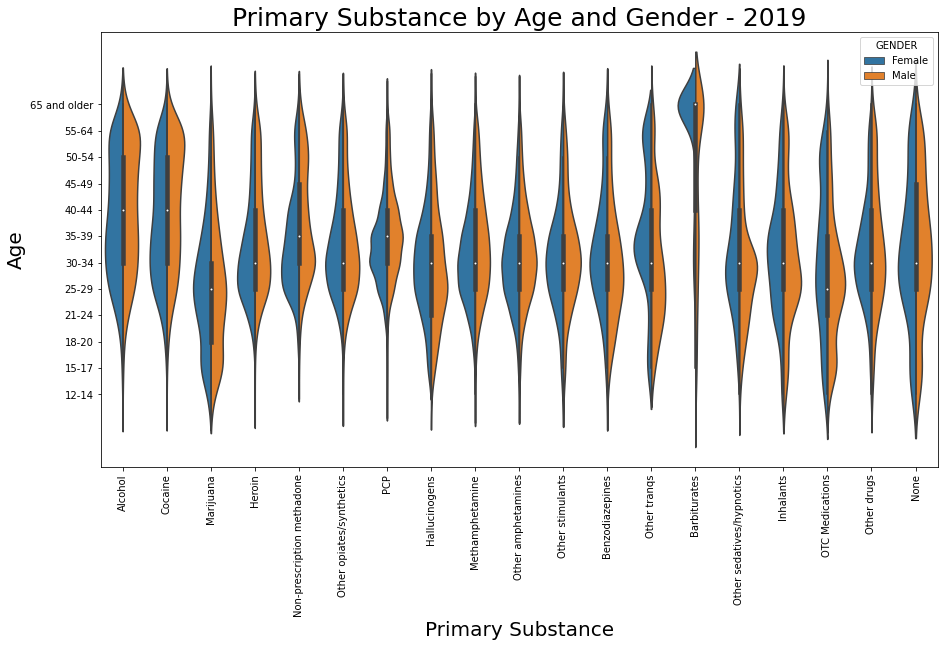

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

test_df=df2019.copy()
test_df=test_df[test_df.RACE != -9]
test_df=test_df[test_df.ETHNIC != -9]
test_df=test_df[test_df.AGE != -9]
test_df=test_df[test_df.GENDER != -9]
test_df=test_df[test_df.SUB1 != -9]

test_df = test_df.replace({'SUB1':substance_dict})
test_df = test_df.replace({'GENDER':gender_dict})

test_df = test_df[['RACE','ETHNIC','AGE','REASON','SUB1','GENDER']]
plt.figure(figsize = (15,8))
ax = sns.violinplot(x='SUB1', y='AGE', 
                    hue='GENDER', split=True,
                    order=['Alcohol','Cocaine','Marijuana','Heroin','Non-prescription methadone',
                           'Other opiates/synthetics','PCP','Hallucinogens','Methamphetamine',
                           'Other amphetamines','Other stimulants','Benzodiazepines','Other tranqs',
                           'Barbiturates','Other sedatives/hypnotics','Inhalants',
                          'OTC Medications','Other drugs','None'],
                    data=test_df, bw=.3)
ax.set_title('Primary Substance by Age and Gender - 2019', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Primary Substance', fontsize=20)
ax.set_ylabel('Age', fontsize=20)

plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12],
          ['12-14','15-17','18-20','21-24','25-29',
           '30-34','35-39','40-44','45-49','50-54',
           '55-64','65 and older'])
#plt.savefig('violin2019.png')

([<matplotlib.axis.YTick at 0x21628d3f130>,
 [Text(0, 1, '12-14'),
  Text(0, 2, '15-17'),
  Text(0, 3, '18-20'),
  Text(0, 4, '21-24'),
  Text(0, 5, '25-29'),
  Text(0, 6, '30-34'),
  Text(0, 7, '35-39'),
  Text(0, 8, '40-44'),
  Text(0, 9, '45-49'),
  Text(0, 10, '50-54'),
  Text(0, 11, '55-64'),
  Text(0, 12, '65 and older')])

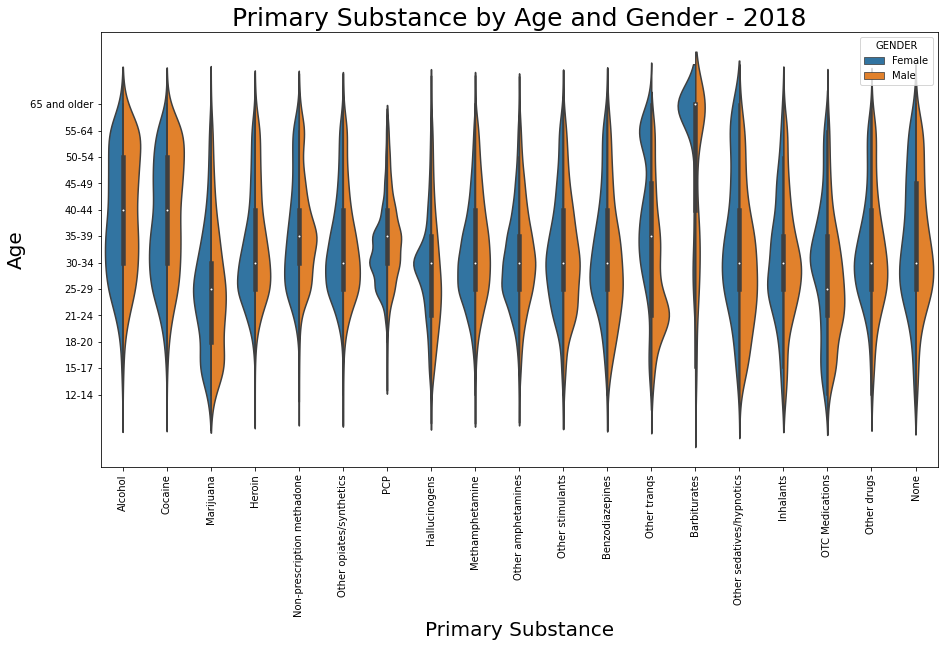

In [23]:
violin_2018 = df2018.copy()
violin_2018 = violin_2018[violin_2018.SUB1 != -9]
violin_2018 = violin_2018[violin_2018.AGE != -9]
violin_2018 = violin_2018[violin_2018.GENDER != -9]
violin_2018 = violin_2018.replace({'SUB1':substance_dict})
violin_2018 = violin_2018.replace({'GENDER':gender_dict})

violin_2018 = violin_2018[['SUB1','AGE','GENDER']]

plt.figure(figsize = (15,8))
ax = sns.violinplot(x='SUB1', y='AGE', 
                    hue='GENDER', split=True,
                    order=['Alcohol','Cocaine','Marijuana','Heroin','Non-prescription methadone',
                           'Other opiates/synthetics','PCP','Hallucinogens','Methamphetamine',
                           'Other amphetamines','Other stimulants','Benzodiazepines','Other tranqs',
                           'Barbiturates','Other sedatives/hypnotics','Inhalants',
                          'OTC Medications','Other drugs','None'],
                    data=violin_2018, bw=.3)
ax.set_title('Primary Substance by Age and Gender - 2018', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Primary Substance', fontsize=20)
ax.set_ylabel('Age', fontsize=20)

plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12],
          ['12-14','15-17','18-20','21-24','25-29',
           '30-34','35-39','40-44','45-49','50-54',
           '55-64','65 and older'])
#plt.savefig('violin2018.png')

([<matplotlib.axis.YTick at 0x21628bfa940>,
 [Text(0, 1, '12-14'),
  Text(0, 2, '15-17'),
  Text(0, 3, '18-20'),
  Text(0, 4, '21-24'),
  Text(0, 5, '25-29'),
  Text(0, 6, '30-34'),
  Text(0, 7, '35-39'),
  Text(0, 8, '40-44'),
  Text(0, 9, '45-49'),
  Text(0, 10, '50-54'),
  Text(0, 11, '55-64'),
  Text(0, 12, '65 and older')])

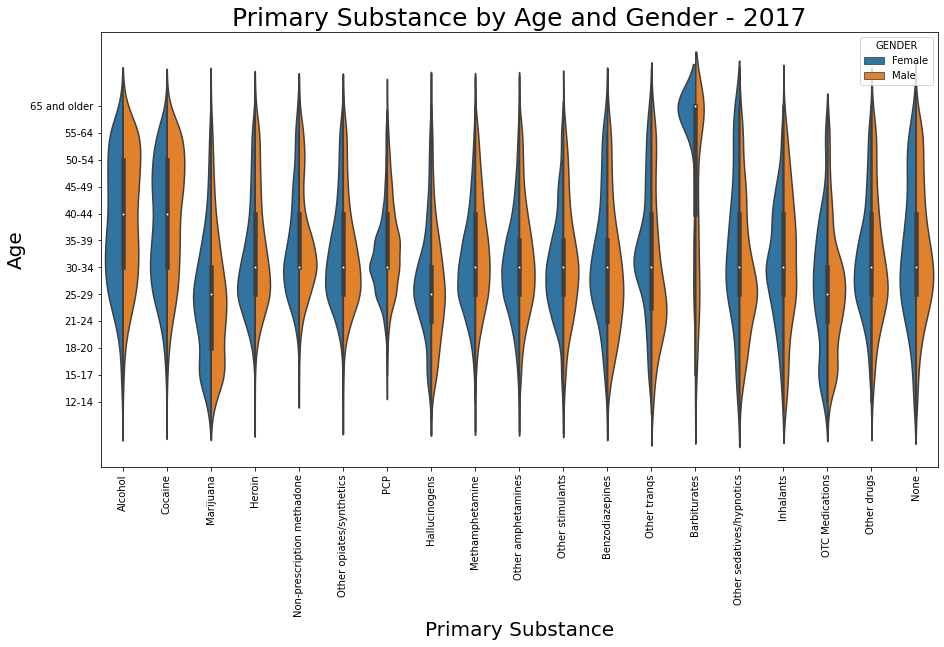

In [24]:
violin_2017 = df2017.copy()
violin_2017 = violin_2017[violin_2017.SUB1 != -9]
violin_2017 = violin_2017[violin_2017.AGE != -9]
violin_2017 = violin_2017[violin_2017.GENDER != -9]
violin_2017 = violin_2017.replace({'SUB1':substance_dict})
violin_2017 = violin_2017.replace({'GENDER':gender_dict})

violin_2017 = violin_2017[['SUB1','AGE','GENDER']]

plt.figure(figsize = (15,8))
ax = sns.violinplot(x='SUB1', y='AGE', 
                    hue='GENDER', split=True,
                    order=['Alcohol','Cocaine','Marijuana','Heroin','Non-prescription methadone',
                           'Other opiates/synthetics','PCP','Hallucinogens','Methamphetamine',
                           'Other amphetamines','Other stimulants','Benzodiazepines','Other tranqs',
                           'Barbiturates','Other sedatives/hypnotics','Inhalants',
                          'OTC Medications','Other drugs','None'],
                    data=violin_2017, bw=.3)
ax.set_title('Primary Substance by Age and Gender - 2017', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Primary Substance', fontsize=20)
ax.set_ylabel('Age', fontsize=20)

plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12],
          ['12-14','15-17','18-20','21-24','25-29',
           '30-34','35-39','40-44','45-49','50-54',
           '55-64','65 and older'])
#plt.savefig('violin2017.png')

([<matplotlib.axis.YTick at 0x21629122e80>,
 [Text(0, 1, '12-14'),
  Text(0, 2, '15-17'),
  Text(0, 3, '18-20'),
  Text(0, 4, '21-24'),
  Text(0, 5, '25-29'),
  Text(0, 6, '30-34'),
  Text(0, 7, '35-39'),
  Text(0, 8, '40-44'),
  Text(0, 9, '45-49'),
  Text(0, 10, '50-54'),
  Text(0, 11, '55-64'),
  Text(0, 12, '65 and older')])

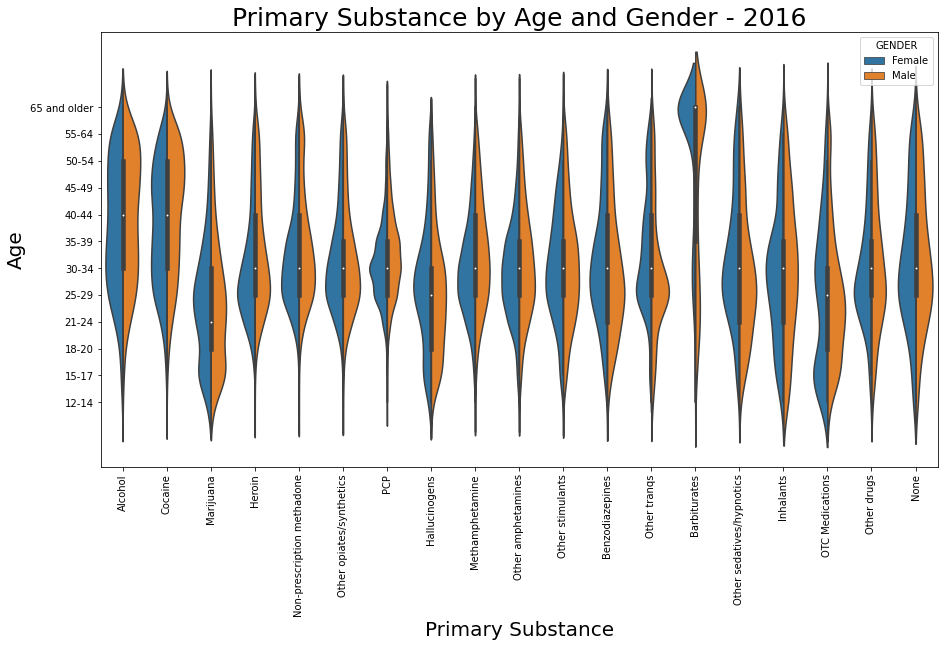

In [25]:
violin_2016 = df2016.copy()
violin_2016 = violin_2016[violin_2016.SUB1 != -9]
violin_2016 = violin_2016[violin_2016.AGE != -9]
violin_2016 = violin_2016[violin_2016.GENDER != -9]
violin_2016 = violin_2016.replace({'SUB1':substance_dict})
violin_2016 = violin_2016.replace({'GENDER':gender_dict})

violin_2016 = violin_2016[['SUB1','AGE','GENDER']]

plt.figure(figsize = (15,8))
ax = sns.violinplot(x='SUB1', y='AGE', 
                    hue='GENDER', split=True,
                    order=['Alcohol','Cocaine','Marijuana','Heroin','Non-prescription methadone',
                           'Other opiates/synthetics','PCP','Hallucinogens','Methamphetamine',
                           'Other amphetamines','Other stimulants','Benzodiazepines','Other tranqs',
                           'Barbiturates','Other sedatives/hypnotics','Inhalants',
                          'OTC Medications','Other drugs','None'],
                    data=violin_2016, bw=.3)
ax.set_title('Primary Substance by Age and Gender - 2016', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Primary Substance', fontsize=20)
ax.set_ylabel('Age', fontsize=20)

plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12],
          ['12-14','15-17','18-20','21-24','25-29',
           '30-34','35-39','40-44','45-49','50-54',
           '55-64','65 and older'])
#plt.savefig('violin2016.png')

In [26]:
end_time = datetime.datetime.now()
end_time

datetime.datetime(2022, 4, 22, 21, 4, 48, 392518)

In [27]:
# How long it took to run our entire notebook
end_time - start_time

datetime.timedelta(seconds=62, microseconds=301598)